# Business Opportunities Detector

The aim of this project is to create a model able of to correctly say if an article from a journal is about the earnings of a journal or not (**business opportunity**). The procedure to create the model is broken down to the following steps: **data collection**, **data preprocessing**, **data visualisation**, **classification** and finally **evaluation**

## Data Collection

In this step, we will build a corpus by collecting the text content from the XML files referred to in *train.csv*. This will pose as the training set. We will also keep the labels and the id of the associated XML files

In [1]:
import pandas as pd
from lxml import etree

# Collect the training data file
train_df = pd.read_csv("train.csv")

# Ids of the XML files
ids = []
# Texts contained in each XML file
texts = []
# Labels associated to the XML file
labels = []

for sample in train_df.values:
    ids.append(sample[0])
    # For each XML file referenced in train.csv, collect the text contained in it
    xml_file = etree.parse("data/"+sample[1])
    xml_text = xml_file.xpath('/BODY')[0].text or ''
    texts.append(xml_text)
    # The label
    labels.append(sample[2])
    
news_data = pd.DataFrame()
news_data['id'] = ids
news_data['text'] = texts
news_data['label'] = labels
news_data

,id,text,label
0,1,Showers continued throughout the week in\nthe ...,0
1,2,Standard Oil Co and BP North America\nInc said...,0
2,3,Texas Commerce Bancshares Inc's Texas\nCommerc...,0
3,4,BankAmerica Corp is not under\npressure to act...,0
4,5,The U.S. Agriculture Department\nreported the ...,0
5,6,Argentine grain board figures show\ncrop regis...,0
6,7,Red Lion Inns Limited Partnership\nsaid it fil...,0
7,8,Moody's Investors Service Inc said it\nlowered...,0
8,9,Champion Products Inc said its\nboard of direc...,1
9,10,Computer Terminal Systems Inc said\nit has com...,0


## Data Preprocessing

Irrespective of the machine learning method we will use, the document need to be represented as a set of features. Here, I will make use of the tf-idf weighting model

In [2]:
# pip install spacy
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
from sklearn.feature_extraction.text import TfidfVectorizer

def lemmatize_document(doc):
    # Tokenize the sentence
    nlp = spacy.load('en_core_web_sm')
    tokens = nlp(doc)
    
    # Lemmatize each of the word in the sentence
    lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
    lemmas = [lemmatizer(token.text, token.pos_) for token in tokens]
    
    # Reconstruct the string sentence
    new_sentence = " ".join(lemmas)
    
    return new_sentence

vectorizer = TfidfVectorizer(stop_words='english', preprocessor=stemSentence, max_features=100)
X = vectorizer.fit_transform(texts)  # Scipy sparse matrix
print(vectorizer.get_feature_names())


C:\Users\deric\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\deric\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


ValueError: cymem.cymem.Pool has the wrong size, try recompiling. Expected 64, got 48

In [0]:
print(X)

# Data visualization

In [0]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Converting scipy sparse matrix to numpy array (for plotting conveniences)
rep_X = X.toarray()
#print(rep_X)

# Standardizing the data
rep_X = StandardScaler().fit_transform(rep_X)
#print(rep_X)

# Projecting to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rep_X)
principalComponents

array([[-0.56957504, -1.20789174],
       [-0.98752394,  0.96742426],
       [-0.21653451, -0.15956995],
       ...,
       [ 2.55201803,  4.16835764],
       [ 6.29876738,  0.17171385],
       [ 0.72672973,  0.56601818]])

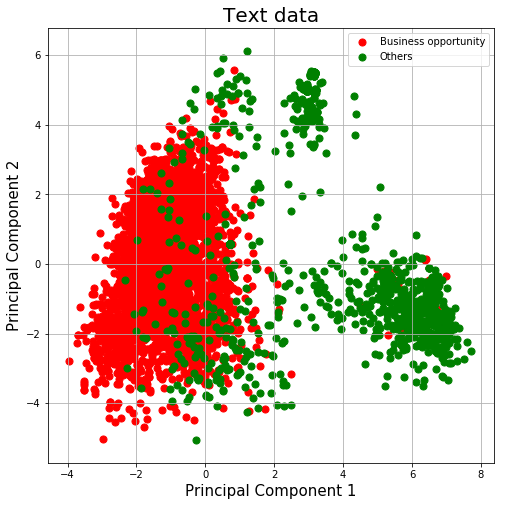

In [0]:
# Visualizing in 2D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('Text data', fontsize=20)

targets = ['Others', 'Business opportunity']
target_indices = [0, 1]
colors = ['r', 'g']
for target, color in zip(target_indices, colors):
    indicesToKeep = news_data['label'] == target
    ax.scatter(principalComponents[indicesToKeep, 0],
              principalComponents[indicesToKeep, 1],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()

# Classification

In [0]:
# Split the data into train and test split
from sklearn.model_selection import train_test_split

y = news_data['label'].values
X_train, X_test, y_train, y_test = train_test_split(rep_X, y, test_size=0.33)

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_train, y_train)
# Training accuracy
accuracy_score(y_train, clf.predict(X_train))

0.972636815920398

In [0]:
# Test accuracy
accuracy_score(y_test, clf.predict(X_test))

0.9621212121212122

In [0]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, clf.predict(X_test))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)

Precision: [0.96500778 0.94966443]
Recall: [0.98805732 0.86280488]
F1-score: [0.97639654 0.90415335]
